In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [344]:
pib_total = pd.read_csv("https://raw.githubusercontent.com/patoba/buenvis/main/Data/pib_total_actividad_economica.csv", encoding= 'UTF-16')
pib_total.head()

,Periodos,Total nacional,Aguascalientes,Baja California,Baja California Sur,Campeche,Coahuila,Colima,Chiapas,Chihuahua,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
0,1980,7357315.714,51050.023,229942.179,39414.131,542396.819,219067.806,40469.620,158583.479,194350.901,...,66743.109,128925.727,184694.565,221500.467,260401.114,202148.879,48014.674,411742.585,87934.565,52903.602
1,1981,8055400.811,56736.416,258615.932,42964.061,595780.815,241828.319,43797.410,168173.703,215240.912,...,72711.611,141415.626,200605.869,245893.637,283903.456,221052.973,52400.613,442572.805,95449.569,56625.330
2,1982,8054789.942,56979.213,256557.457,43253.075,594255.250,241631.083,44229.693,169465.737,214385.387,...,72306.231,140984.461,200500.107,244165.605,284156.587,221369.064,52438.251,444623.143,95772.004,57223.942
3,1983,7703361.019,54117.817,235110.403,42389.852,554293.697,225983.348,43266.894,167419.892,202765.056,...,69600.571,133967.308,194538.736,227462.570,270729.477,210483.546,50152.905,434154.350,92941.080,56881.979
4,1984,7971954.982,56629.523,245662.548,44035.869,579164.673,235373.779,44839.682,172198.568,210612.501,...,71865.703,138617.202,200554.634,236403.169,281155.500,219047.450,51967.690,447494.320,96022.620,58713.776


In [86]:
def dict_inv(d):
    d_inv = dict()
    for k in d:
        for v in d[k]:
            d_inv[v] = k
    return d_inv

In [87]:
regiones = {"Noroeste":["Baja California", "Baja California Sur", "Chihuahua", "Durango", "Sinaloa", "Sonora"],
           "Noreste":["Coahuila", "Nuevo León", "Tamaulipas"],
           "Oeste":["Colima", "Jalisco", "Michoacán", "Nayarit"],
           "Este":["Hidalgo", "Puebla", "Tlaxcala", "Veracruz"],
           "Centronorte":["Aguascalientes", "Guanajuato", "Querétaro", "San Luis Potosí", "Zacatecas"],
           "Centrosur":["Ciudad de México", "México", "Morelos"],
           "Suroeste":["Chiapas", "Guerrero", "Oaxaca"],
           "Sureste":["Campeche", "Quintana Roo", "Tabasco", "Yucatán"]
           }
regiones_inv = dict_inv(regiones)

In [88]:
pib_region = pd.DataFrame()
pib_region["Periodo"] = pib_total["Periodos"]
for region in regiones:
    pib_region[region] = pib_total[regiones[region]].sum(axis=1)

In [89]:
pib_region.head()

,Periodo,Noroeste,Noreste,Oeste,Este,Centronorte,Centrosur,Suroeste,Sureste
0,1980,960862.211,802227.682,769577.667,785845.009,560446.648,2083272.462,437608.428,957475.607
1,1981,1061709.583,886773.911,837165.144,850130.234,617332.434,2291692.598,462751.456,1047845.451
2,1982,1056779.321,888115.028,839868.941,852791.495,618098.942,2287625.352,465020.791,1046490.072
3,1983,996322.175,840470.888,809493.579,824423.031,589813.039,2197336.648,457936.834,987564.825
4,1984,1034031.482,876085.297,837194.907,852020.442,612786.875,2262516.815,469110.668,1028208.496


In [335]:
pib_animado = pib_total.melt("Periodos", var_name = "Estado", value_name = "PIB")
pib_animado = pib_animado[pib_animado.Estado != "Total nacional"]
pib_animado["Region"] = pib_animado.Estado.apply(regiones_inv.get)
pib_animado["PIB_SIZE"] = pib_animado["PIB"] * 5
pib_animado

,Periodos,Estado,PIB,Region,PIB_SIZE
40,1980,Aguascalientes,51050.023,Centronorte,255250.115
41,1981,Aguascalientes,56736.416,Centronorte,283682.080
42,1982,Aguascalientes,56979.213,Centronorte,284896.065
43,1983,Aguascalientes,54117.817,Centronorte,270589.085
44,1984,Aguascalientes,56629.523,Centronorte,283147.615
...,...,...,...,...,...
1315,2015,Zacatecas,159905.359,Centronorte,799526.795
1316,2016,Zacatecas,157998.056,Centronorte,789990.280
1317,2017,Zacatecas,157621.131,Centronorte,788105.655
1318,2018,Zacatecas,157715.576,Centronorte,788577.880


# Producto Interno Bruto

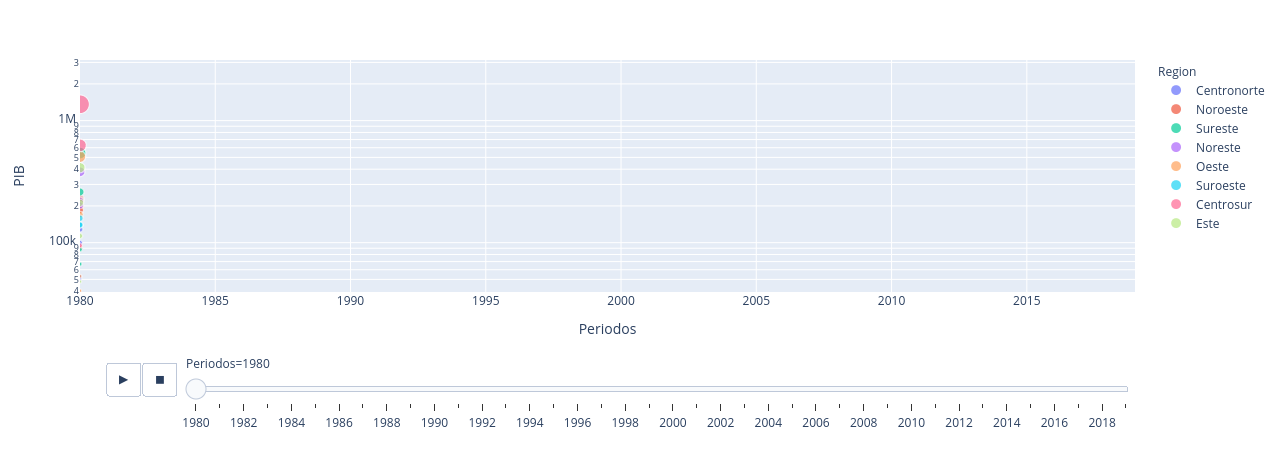

In [336]:
px.scatter(pib_animado, x="Periodos", y="PIB", animation_frame="Periodos", animation_group="Estado",
           size="PIB_SIZE", color="Region", hover_name="Estado",log_y=True,
          range_x=[1980,2019], range_y=[pib_animado.PIB.min(), pib_animado.PIB.max()])

# Regiones

In [135]:
gray_1 = "#DEE2E6"
gray_2 = "#C0C5C9"
gray_3 = "#A2A8AD"
gray_4 = "#858A90"
gray_5 = "#676D74"
gray_6 = "#495057"
Rojo = "#ef233c"
Azul = "#48cae4"
Amarillo = "#faa307"

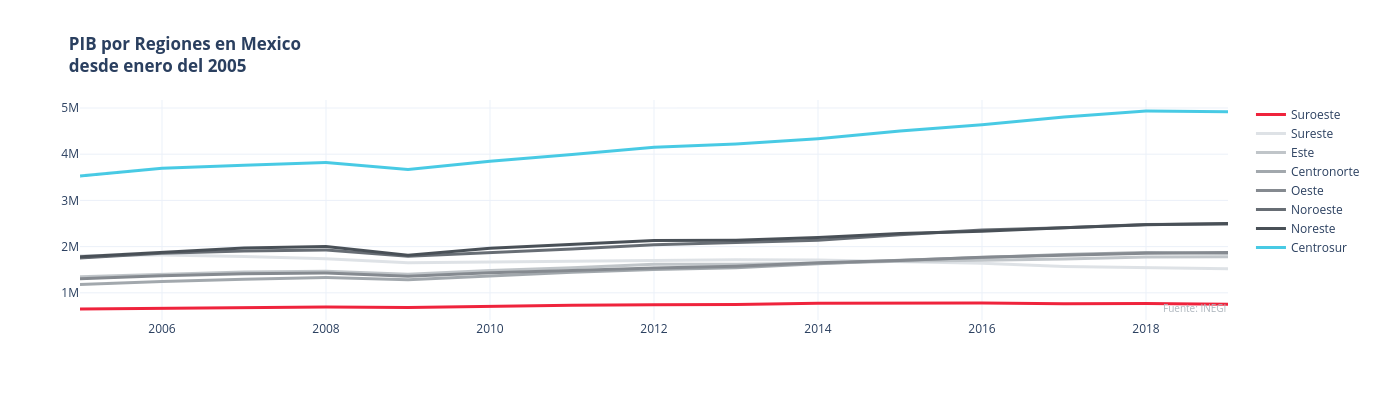

In [159]:
title = 'PIB por Region'
labels = list(regiones.keys())
labels = sorted(labels, key=lambda x : pib_region[x].values[-1])
colors = [Rojo, gray_1, gray_2, gray_3, gray_4, gray_5, gray_6, Azul] 
template = 'plotly_white'
subtitle_color = "#adb5bd"


mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

fig = go.Figure()

for i, region in enumerate(labels):
    fig.add_trace(go.Scatter(x=pib_region["Periodo"].values[-15:], 
                             y=pib_region[region].values[-15:], mode='lines',
        name=region,
        line=dict(color=colors[i], width=3),
        connectgaps=True,
    ))

fig.update_layout(
    title=dict(
        text=f"<b>PIB por Regiones en Mexico<b><br>desde enero del 2005"
    ),
    width=800, height=400, template=template
)

fig.add_annotation(
    text=f"Fuente: INEGI",
    align='left',
    font=dict(
        size=10,
        color=subtitle_color
    ),
    xref='paper', x=1, xanchor='auto',
    yref='paper', y=0.01, yanchor='auto',
    showarrow=False
)

# fig.update_layout(annotations=annotations)

fig.show()

# Mapa

In [324]:
import chart_studio

username = "patoba"
api_key = "hCTHU1jIWTyVMiW8Hfjz"

import chart_studio.plotly as py
import chart_studio.tools as tls

tly.set_credentials_file(username=username, api_key=api_key)

In [160]:
import requests


In [180]:
pib_2019 = pib_total[pib_total.Periodos == 2019].iloc[:, 2:].T.reset_index().rename(columns={"index":"estado", 39:"pib"})
pib_2019.head()

,estado,pib
0,Aguascalientes,223043.179
1,Baja California,576310.256
2,Baja California Sur,157812.611
3,Campeche,517911.715
4,Coahuila,605800.716


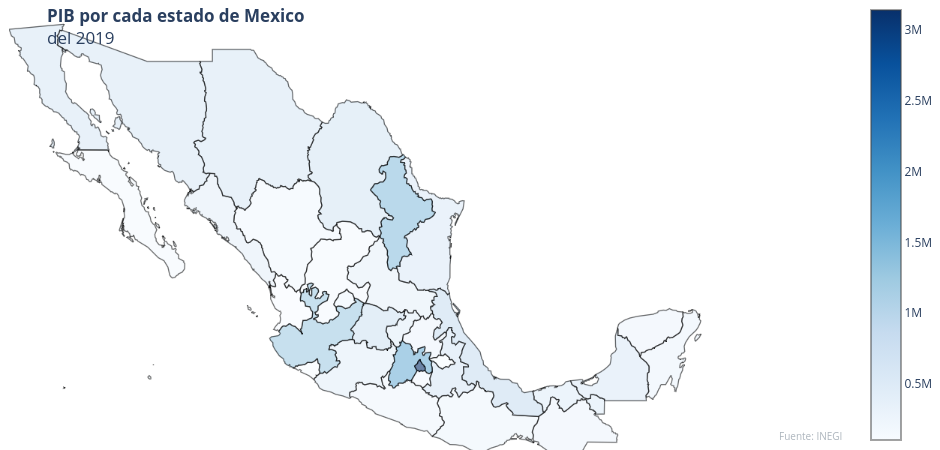

In [338]:
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' 
mx_regions_geo = requests.get(repo_url).json()

fig = go.Figure(go.Choroplethmapbox(name='Mexico', geojson=mx_regions_geo, ids=pib_2019['estado'], z=pib_2019['pib'],
                                  locations=pib_2019['estado'], featureidkey='properties.name', colorscale="Blues",
                                  marker=dict(line=dict(color='black'), opacity=0.6)))
fig.update_layout(mapbox_style="white-bg",
                  mapbox_zoom=4, 
                  mapbox_center = {'lat': 25, 'lon': -99}
                 )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(
    title=dict(
        text=f"<br><b>PIB por cada estado de Mexico</b><br>del 2019"
    )
)
fig.add_annotation(
    text=f"Fuente: INEGI",
    align='left',
    font=dict(
        size=10,
        color=subtitle_color
    ),
    xref='paper', x=1, xanchor='auto',
    yref='paper', y=0.01, yanchor='auto',
    showarrow=False
)
fig.show()

In [339]:
tls.get_embed(py.plot(fig, filename='mapa_final', auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~patoba/11.embed" height="525" width="100%"></iframe>'

# Actividades Principales

# Crecimiento

In [ ]:
annotations = []

# Adding labels
for y_trace, label, color in zip(pib_region.iloc[:, 1:].values, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}%'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[-1],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(y_trace[-1]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=title,
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: INEGI - Banco de Información Económica',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

In [343]:
actividades = pd.read_csv("https://raw.githubusercontent.com/patoba/buenvis/main/Data/actividades.csv", encoding= 'UTF-16') # INEGI. Sistema de Cuentas Nacionales de México
actividades

,Periodos,actividades_primarias,actividades_secundarias,actividades_terciarias
0,1980/01,320667.549,2864062.900,4.081059e+06
1,1980/02,287579.268,2877701.652,4.089570e+06
2,1980/03,304948.751,2935853.315,3.958468e+06
3,1980/04,316649.932,3037769.962,4.354933e+06
4,1981/01,335400.962,3142427.449,4.443827e+06
...,...,...,...,...
160,2020/01,561290.095,5226028.598,1.144985e+07
161,2020/02,584274.690,3965669.437,9.837714e+06
162,2020/03,509682.946,4890797.550,1.065894e+07
163,2020/04,700527.887,5032375.343,1.150501e+07


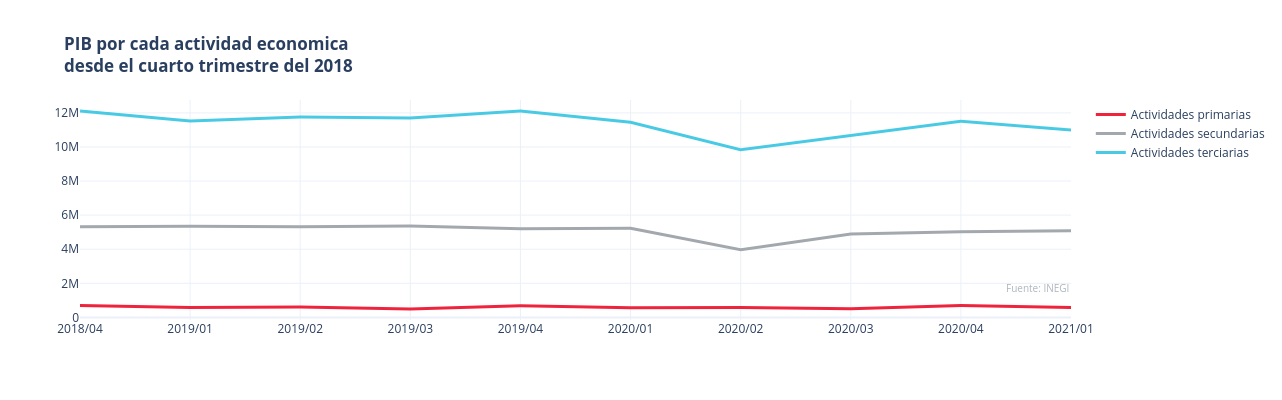

In [243]:
labels = list(actividades.columns[1:])
labels = sorted(labels, key=lambda x : actividades[x].values[-1])
colors = [Rojo, gray_3, Azul] 
template = 'plotly_white'
subtitle_color = "#adb5bd"

fig = go.Figure()

for i, region in enumerate(labels):
    fig.add_trace(go.Scatter(x=actividades["Periodos"].values[-10:], 
                             y=actividades[region].values[-10:], mode='lines',
        name=region.replace("_", " ").capitalize(),
        line=dict(color=colors[i], width=3),
        connectgaps=True,
    ))

fig.update_layout(
    title=dict(
        text=f"<b>PIB por cada actividad economica<b><br>desde el cuarto trimestre del 2018"
    ),
    width=800, height=400, template=template
)

fig.add_annotation(
    text=f"Fuente: INEGI",
    align='left',
    font=dict(
        size=10,
        color=subtitle_color
    ),
    xref='paper', x=1, xanchor='auto',
    yref='paper', y=0.1, yanchor='auto',
    showarrow=False
)

fig.show()

In [342]:
porcentaje = pd.read_csv("https://raw.githubusercontent.com/patoba/buenvis/main/Data/procentaje.csv", encoding = "UTF-16")
porcentaje.tail()

,Periodos,Producto Interno Bruto
56,2020/01,-1.200549
57,2020/02,-18.597250
58,2020/03,-8.521680
59,2020/04,-4.247979
60,2021/01,-3.392055


In [306]:
porcentaje[["Anio", "Trimestre"]] = porcentaje.Periodos.str.split("/", expand = True)
porcentaje.Anio = porcentaje.Anio.astype(int)
porcentaje

,Periodos,Producto Interno Bruto,Anio,Trimestre
0,2006/01,5.560712,2006,01
1,2006/02,4.105060,2006,02
2,2006/03,4.619395,2006,03
3,2006/04,3.290716,2006,04
4,2007/01,2.020673,2007,01
...,...,...,...,...
56,2020/01,-1.200549,2020,01
57,2020/02,-18.597250,2020,02
58,2020/03,-8.521680,2020,03
59,2020/04,-4.247979,2020,04


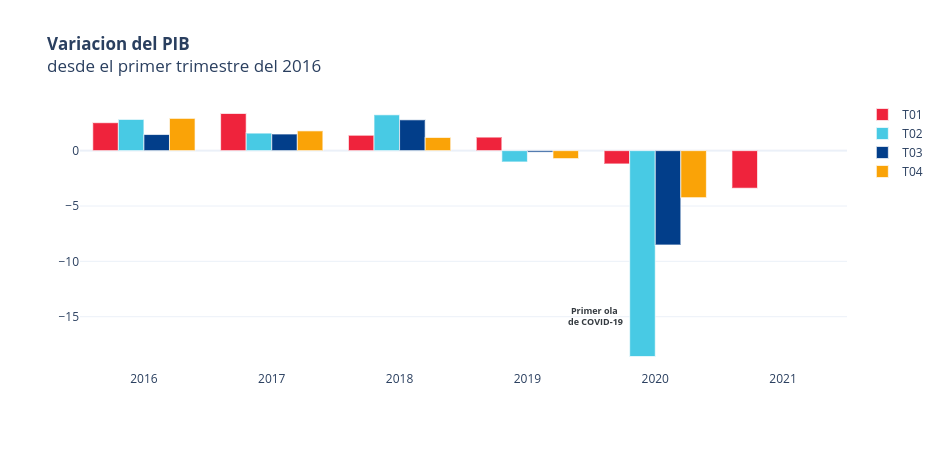

In [340]:
colors = [Rojo, Azul,  "#023e8a", Amarillo] 
template = 'plotly_white'
subtitle_color = "#adb5bd"

fig = go.Figure()

for i, t in enumerate(porcentaje.Trimestre.unique()):
    
    data = porcentaje[(porcentaje.Trimestre == t) & (porcentaje.Anio >= 2016)]
    fig.add_trace(go.Bar(x=data["Anio"], y=data["Producto Interno Bruto"],
                    marker_color=colors[i],
                    name='T' + t))

fig.update_layout(
    title=dict(
        text=f"<b>Variacion del PIB</b><br>desde el primer trimestre del 2016"
    ), template=template
)

fig.add_annotation(
    text=f"<b>Primer ola <br>de COVID-19",
    align='center',
    font=dict(
        size=9,
        color='#343a40'
    ),
    xref='paper', x=0.71, xanchor='auto',
    yref='paper', y=0.15, yanchor='auto',
    showarrow=False
)

fig.show()

In [341]:
tls.get_embed(py.plot(fig, filename='variacion_pib_final', auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~patoba/15.embed" height="525" width="100%"></iframe>'